In [14]:
# Import imputation data
import pandas as pd
cols=['shop_id','fcc','trans_typ','period_number','atc_4_cd','atc_3_cd','atc_2_cd','atc_1_cd','kvb_code','kv_code','federal_state_code','national_code','classification','past_periods_tx_cnt','curr_period_tx_cnt']
data = pd.read_csv("data_with_all_attribute.csv",names=cols)

In [15]:
data.head(5)
# FACT - Transaction Data
# PRODUCT - Product related hierarchy (ex - ATC Classification)
# GEOGRAPHY - Supplier/Pharmacy realted hierarchy (ex - state, zip code, TRA, SRA)
# TIME - date hierarchy

,shop_id,fcc,trans_typ,period_number,atc_4_cd,atc_3_cd,atc_2_cd,atc_1_cd,kvb_code,kv_code,federal_state_code,national_code,classification,past_periods_tx_cnt,curr_period_tx_cnt
0,1003,1269,P,20171229,N02B2,N02B,N02,N,6,17,3,1,TOP,1.0,0.0
1,1003,2019,Q,20180105,N02B2,N02B,N02,N,6,17,3,1,OTHER,1.0,0.0
2,1003,2881,R,20180126,D07B3,D07B,D07,D,6,17,3,1,OTHER,0.0,1.0
3,1003,5174,P,20180112,Y08A1,Y08A,Y08,Y,6,17,3,1,OTHER,1.0,0.0
4,1003,7070,P,20180126,B03A1,B03A,B03,B,6,17,3,1,TOP,0.0,1.0


In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline

class MultiColumnLabelEncoder:
    def __init__(self,columns = None):
        self.columns = columns # array of column names to encode

    def fit(self,X,y=None):
        return self # not relevant here

    def transform(self,X):
        '''
        Transforms columns of X specified in self.columns using
        LabelEncoder(). If no columns specified, transforms all
        columns in X.
        '''
        output = X.copy()
        if self.columns is not None:
            for col in self.columns:
                output[col] = LabelEncoder().fit_transform(output[col])
        else:
            for colname,col in output.iteritems():
                output[colname] = LabelEncoder().fit_transform(col)
        return output

    def fit_transform(self,X,y=None):
        return self.fit(X,y).transform(X)

In [ ]:
data_useful_columns = data.drop(['shop_id'],axis=1).drop(['fcc'],axis=1)


In [ ]:
# Encoding String to Numbers
transformed_data = MultiColumnLabelEncoder(columns = ['trans_typ','period_number','atc_4_cd','atc_3_cd','atc_2_cd',
                                                     'atc_1_cd','classification']).fit_transform(data_useful_columns)
transformed_data.head(5)

In [ ]:
transformed_data = transformed_data.drop_duplicates()

In [ ]:
transformed_data.shape

In [ ]:
# Saving encoded data
transformed_data.to_csv("imputation_ml_transformed_data.csv")

In [2]:
# Readng Encoded data
import pandas as pd
en_data = pd.read_csv("imputation_ml_transformed_data.csv").drop(['Unnamed: 0'],axis=1)

In [3]:
en_data.head(5)

,trans_typ,period_number,atc_4_cd,atc_3_cd,atc_2_cd,atc_1_cd,kvb_code,kv_code,federal_state_code,national_code,classification,past_periods_tx_cnt,curr_period_tx_cnt
0,0,0,397,224,72,10,6,17,3,1,1,1.0,0.0
1,1,1,397,224,72,10,6,17,3,1,0,1.0,0.0
2,2,4,192,110,36,3,6,17,3,1,0,0.0,1.0
3,0,2,795,384,109,17,6,17,3,1,0,1.0,0.0
4,0,4,119,65,17,1,6,17,3,1,1,0.0,1.0


In [16]:
Y_temp = en_data[['curr_period_tx_cnt']]
en_data_X = en_data.drop(['curr_period_tx_cnt'],axis=1)

In [ ]:
en_data_X.atc_4_cd.unique()

In [17]:
# Normalizing Data 
from sklearn import preprocessing

x = en_data_X.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df = pd.DataFrame(x_scaled)
df.columns = ['trans_typ','period_number','atc_4_cd','atc_3_cd','atc_2_cd','atc_1_cd','kvb_code','kv_code','federal_state_code','national_code','classification','past_periods_tx_cnt']

In [18]:
df.head(5)

,trans_typ,period_number,atc_4_cd,atc_3_cd,atc_2_cd,atc_1_cd,kvb_code,kv_code,federal_state_code,national_code,classification,past_periods_tx_cnt
0,0.0,0.00,0.493781,0.581818,0.654545,0.588235,0.052632,0.164948,0.133333,0.0,1.0,0.001155
1,0.5,0.25,0.493781,0.581818,0.654545,0.588235,0.052632,0.164948,0.133333,0.0,0.0,0.001155
2,1.0,1.00,0.238806,0.285714,0.327273,0.176471,0.052632,0.164948,0.133333,0.0,0.0,0.000000
3,0.0,0.50,0.988806,0.997403,0.990909,1.000000,0.052632,0.164948,0.133333,0.0,0.0,0.001155
4,0.0,1.00,0.148010,0.168831,0.154545,0.058824,0.052632,0.164948,0.133333,0.0,1.0,0.000000


In [19]:
# Segregating data into X and Y
Y = Y_temp
X = df

In [20]:
# Checks on X and Y

print(Y.shape)
print(X.shape)

(1329974, 1)
(1329974, 12)


In [21]:
# Train and Test Set
import sklearn.model_selection as sk
X_train, X_test, Y_train, Y_test = sk.train_test_split(X, Y, test_size=0.30)

In [22]:
#Check on Train an Test Set
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(930981, 12)
(398993, 12)
(930981, 1)
(398993, 1)


In [23]:
# Number of features
num_features = X.shape[1]
num_rows = X_train.shape[0]
print(str(num_features) + " " + str(num_rows))

12 930981


In [69]:
import tensorflow as tf
tf.reset_default_graph() 
# Step 2: create placeholders for X (imputation features) and Y (transactions)
X_placeholder = tf.placeholder(tf.float32, shape=(None,num_features), name='imp_features')
Y_placeholder = tf.placeholder(tf.float32, shape=(None,1), name='transactions')
print(X_placeholder.shape)

(?, 12)


In [70]:
# Step 3: create weight and bias, initialized to 0.0
# Make sure to use tf.get_variable

w = tf.get_variable("weight", shape=(num_features,1), initializer=tf.zeros_initializer())
b = tf.get_variable("bias", shape=[], initializer=tf.zeros_initializer())
print(w.shape)

(12, 1)


In [71]:
# Step 4: build model to predict Y
# e.g. how would you derive at Y_predicted given X, w, and b
Y_predicted = tf.add(tf.matmul(X_placeholder,w),b)
print(Y_predicted.shape)

(?, 1)


In [73]:
# Step 5: use the mean square error as the loss function
loss = tf.reduce_mean(tf.square(tf.subtract(Y_placeholder,Y_predicted)), name = 'loss')

In [77]:
# Step 6: using gradient descent with learning rate of 0.001 to minimize loss
optimizer = tf.train.GradientDescentOptimizer(0.001).minimize(loss)

In [78]:
with tf.Session() as sess:
    # Step 7: initialize the necessary variables, in this case, w and b
    sess.run(tf.global_variables_initializer())
    w_out, b_out = sess.run([w, b])
    #print("w initial  = %s, b initial = %s" % (w_out, b_out))

    # Step 8: train the model for 100 epochs
    for i in range(200):
        total_loss = 0
        # Execute train_op and get the value of loss.
        # Don't forget to feed in data for placeholders
        _, loss_ = sess.run([optimizer, loss], feed_dict={X_placeholder: X_train, Y_placeholder: Y_train})
        total_loss += loss_

        if(i % 10 == 0):
            print('Epoch {0}: {1}'.format(i, loss_))

    # Step 9: output the values of w and b
    w_out, b_out = sess.run([w, b])
    print("w = %s, b = %s" % (w_out, b_out))

Epoch 0: 11.612269401550293
Epoch 10: 11.498550415039062
Epoch 20: 11.397409439086914
Epoch 30: 11.313972473144531
Epoch 40: 11.24341869354248
Epoch 50: 11.181818008422852
Epoch 60: 11.125988006591797
Epoch 70: 11.076213836669922
Epoch 80: 11.032707214355469
Epoch 90: 10.994501113891602
Epoch 100: 10.960685729980469
Epoch 110: 10.930789947509766
Epoch 120: 10.90427017211914
Epoch 130: 10.880675315856934
Epoch 140: 10.859549522399902
Epoch 150: 10.840557098388672
Epoch 160: 10.823464393615723
Epoch 170: 10.808103561401367
Epoch 180: 10.79406452178955
Epoch 190: 10.781224250793457
w = [[ 0.07077146]
 [ 0.23239918]
 [ 0.0751486 ]
 [ 0.08666574]
 [ 0.09330966]
 [ 0.08482331]
 [ 0.07201794]
 [ 0.07658242]
 [ 0.06518528]
 [ 0.        ]
 [ 0.13289766]
 [-0.0005422 ]], b = 0.16246165


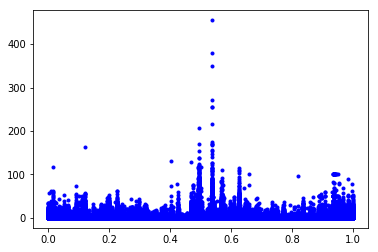

In [79]:
# Plotting original Data
import matplotlib.pyplot as plt
x_axis = X_train['atc_4_cd']
y_axis = Y_train.curr_period_tx_cnt.values
#print(type(y_axis))
plt.plot(x_axis, y_axis, "b.", label='Real data')
plt.show()

In [81]:
calculted_y_temp = X_train.dot(w_out)
#calculted_y_temp.values
calculted_y = b_out + calculted_y_temp.values
type(calculted_y)


numpy.ndarray

<function matplotlib.pyplot.show(*args, **kw)>

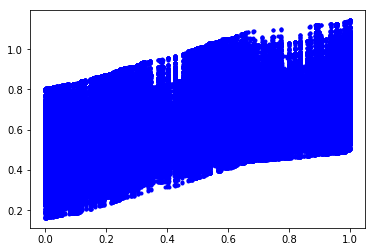

In [82]:
# Plotting Calculated data
plt.plot(x_axis, calculted_y,"b.")
plt.show